# TP3:Hasting-Metropolis (and Gibbs) samplers

## Exercice 2: Multiplicative Hastings-Metropolis

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Cauchy distribution

def target1(x):
    a = 2.
    return 1./(a*(np.pi)*(1+(x/a)**2))

In [175]:
## multimodal distribution
mus = 50*np.random.randn(5)
def target2(x):
    res = 0
    sigma2 = 0.5
     
    for mu in mus:
        res+= (1/(4*np.pi*sigma2))*np.exp(-(1/(2*sigma2))*(x-mu)**2)
    return(res)

In [173]:
def update_MMH(x,pi):
    """
        Updates the state of the Markov Chain using a multiplicative Hasting-Metropolis step
    """
    e = 2*np.random.rand()-1 # We choose the logarithmic step uniformly at random
    u = np.random.rand() # Simulates a bernouilli variable
    
    if(u<0.5):
        proposal = e*x
    else:
        proposal = (1./e)*x

    alpha = np.abs((pi(proposal)*proposal)/(pi(x)*x))
    u = np.random.rand() # Simulates the acceptation decision
    if(u<alpha):
        new_x = proposal
    if(u>alpha):
        new_x = x
    return new_x

def MMH(x0,pi,Niter):
    """
        Samples from the target distribution pi using the Multiplicative Hasting-Metropolis algorithm
    """
    x = x0
    history = []
    for i in range(Niter):
        x = update_MMH(x,pi)
        history.append(x)
    return x,history

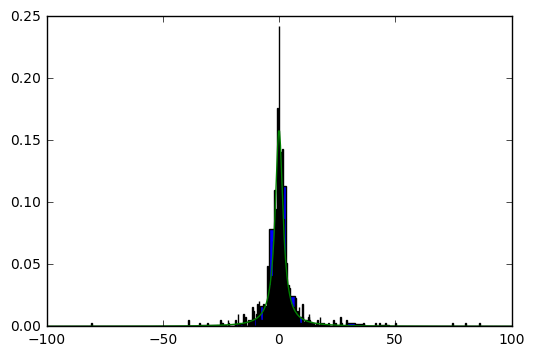

In [168]:
x0 = 10*np.random.rand()
x,xs = MMH(x0,target1,1000)

plt.xlim(-100,100)
n, bins, patches=plt.hist(xs,bins=1000,normed=True)
plt.plot(a,target1(a),c = 'g')
plt.show()

On voit que la densité est bien approximée dans le cas de la distribution de Cauchy, qui peut être samplée par une méthode d'inversion.


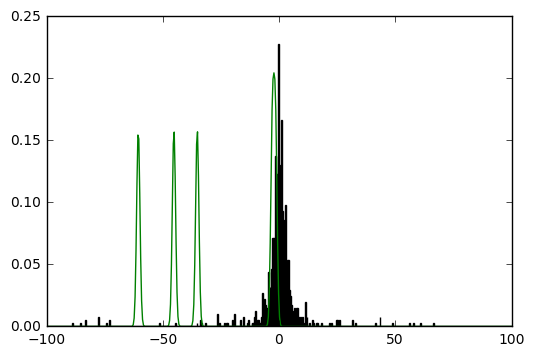

In [176]:
x0 = 50*np.random.rand()
x,xs = MMH(x0,target1,1000)

plt.xlim(-100,100)
n, bins, patches=plt.hist(xs,bins=1000,normed=True)
plt.plot(a,target2(a),c = 'g')
plt.show()

On voit que dans le cas d'un mélange de gaussienne (distribution multimodale) l'histogramme n'approxime pas bien la densité car les échantillons restent "coincés" au voisinage d'un unique mode. 